<a href="https://colab.research.google.com/github/Shrusti23/EE258_neural-networks/blob/master/MNIST_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U memory_profiler
!pip install keras-tqdm
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

!pip install tensorflow==1.14.0
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras import backend as K
from keras.utils.vis_utils import plot_model 


from keras_tqdm import TQDMNotebookCallback 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
 # Install virtualenv system-wide
! pip install virtualenv

!pip install --upgrade wandb





Requirement already up-to-date: memory_profiler in /usr/local/lib/python3.6/dist-packages (0.57.0)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


Requirement already up-to-date: wandb in /usr/local/lib/python3.6/dist-packages (0.8.31)


In [0]:
# Loading the data
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()



2


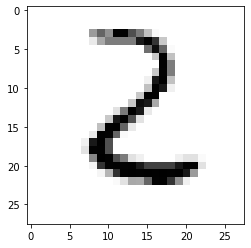

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# You may select anything up to 60,000
image_index = 5908

print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')



In [4]:
#reshaping the input data
x_train.shape


(60000, 28, 28)

In [5]:
# input image dimensions 
from decimal import Decimal

img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10 
epochs = 15
# the data, split between train and test sets
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) # 1 of 60K, grayscale value, 28,28
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
    input_shape = (img_rows, img_cols, 1)
    

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_train //= 255
x_test //= 255
print('x_train shape:', x_train.shape) 
print(x_train.shape[0], 'train samples') 
print(x_test.shape[0], 'test samples')



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_test.shape

(10000, 28, 28, 1)

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = Sequential() # helps in adding layer by layer hence the use of "add"
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape,data_format="channels_last"))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))# avoids overfitting by dropping out few neurons for next layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [10]:
input_shape

(28, 28, 1)

In [11]:
# start train # fit is the keyword used to train 
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20,
verbose=0,validation_data=(x_test, y_test), callbacks=[TQDMNotebookCallback()])

import wandb
wandb.init(sync_tensorboard=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


W&B Run: https://app.wandb.ai/shrusti/uncategorized/runs/24lxy5p8

In [12]:
# save model
history.history['acc']
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy on test set: ",score[1])


Accuracy on test set:  0.4369


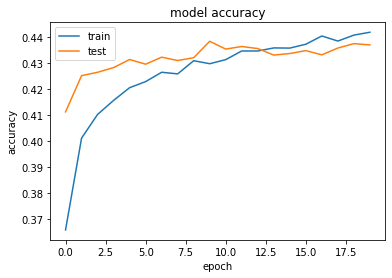

In [13]:
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc'])
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

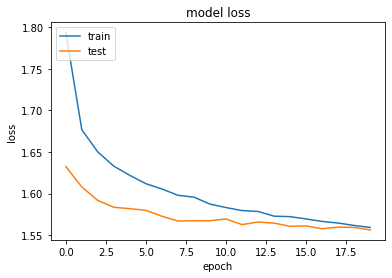

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
 # Install virtualenv system-wide
! pip install virtualenv

!pip install --upgrade wandb


import wandb
wandb.init(sync_tensorboard=True)


Requirement already up-to-date: wandb in /usr/local/lib/python3.6/dist-packages (0.8.31)


W&B Run: https://app.wandb.ai/shrusti/uncategorized/runs/3vlr9j1k